#### json DataFrame으로 읽어오기

In [2]:
import pandas as pd
import os
import json

df = pd.read_json('./json_100/json_100.json')
df.head()

,environmental_factors,image_id,individual_factors,technical_factors
0,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_120952,"[{'camera_temp': 35.9, 'individual_temp': 36.1...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
1,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_122515,"[{'camera_temp': 36.3, 'individual_temp': 36.7...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
2,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_124310,"[{'camera_temp': 36.9, 'individual_temp': 37.3...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
3,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_125954,"[{'camera_temp': 36.1, 'individual_temp': 36.8...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
4,"{'illumination': 326, 'temp_inside': 22.0, 'ca...",A1_H_T_20201110_131527,"[{'camera_temp': 36.9, 'individual_temp': 36.6...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."


In [3]:
df['individual_factors'].iloc[0]

[{'camera_temp': 35.9,
  'individual_temp': 36.1,
  'distance': 5,
  'bbox': [898, 506, 224, 235],
  'optional': {'gender': 'male',
   'body_type': 'normal',
   'mask_exists': True,
   'tall': '120-180',
   'is_short_sleeve': False,
   'age': 'middle-age',
   'outer_exists': True}}]

#### => nested 구조이고 individual_fators 만 값이 리스트 형태로 존재
#### => individual_factors 컬럼 값 수정 (리스트 안의 값을 밖으로)

In [4]:
df['individual_factors']=[li[0] for li in df['individual_factors']]

#### nested 구조를 각각의 값을 컬럼으로 가진 데이터프레임으로 변경

In [5]:
json_struct = json.loads(df.to_json(orient="records"))    
df_flat = pd.io.json.json_normalize(json_struct)

In [6]:
df_flat.head()

,environmental_factors.camera_type,environmental_factors.day,environmental_factors.hms,environmental_factors.humid_inside,environmental_factors.humid_outside,environmental_factors.illumination,environmental_factors.image_type,environmental_factors.place,environmental_factors.temp_inside,environmental_factors.temp_outside,...,individual_factors.optional.outer_exists,individual_factors.optional.tall,technical_factors.bbody_emissivity,technical_factors.bbody_temp,technical_factors.model,technical_factors.netd,technical_factors.range_of_spectrum,technical_factors.resolution,technical_factors.temperature_accuracy,technical_factors.temperature_range
0,H,20201110,120952,23.0,30.0,328,T,A1,21.3,12.1,...,True,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
1,H,20201110,122515,23.0,30.0,328,T,A1,21.3,12.1,...,True,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
2,H,20201110,124310,23.0,30.0,328,T,A1,21.3,12.1,...,False,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
3,H,20201110,125954,23.0,30.0,328,T,A1,21.3,12.1,...,False,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
4,H,20201110,131527,23.0,30.0,326,T,A1,22.0,12.2,...,False,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103


#### 컬럼명 수정

In [7]:
df_flat.columns=[c.split('.')[-1] for c in df_flat.columns]
df_flat.head()


,camera_type,day,hms,humid_inside,humid_outside,illumination,image_type,place,temp_inside,temp_outside,...,outer_exists,tall,bbody_emissivity,bbody_temp,model,netd,range_of_spectrum,resolution,temperature_accuracy,temperature_range
0,H,20201110,120952,23.0,30.0,328,T,A1,21.3,12.1,...,True,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
1,H,20201110,122515,23.0,30.0,328,T,A1,21.3,12.1,...,True,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
2,H,20201110,124310,23.0,30.0,328,T,A1,21.3,12.1,...,False,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
3,H,20201110,125954,23.0,30.0,328,T,A1,21.3,12.1,...,False,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103
4,H,20201110,131527,23.0,30.0,326,T,A1,22.0,12.2,...,False,120-180,0.97\u00b10.02,35\u2103,DH-TPC-BF3221-T,\u226450mK,8~14\u339b,1280x960,\u00b10.3\u2103 w/blackbody,30~45\u2103


#### unicode 값을 수정

In [8]:
df['technical_factors'].iloc[0]

{'bbody_temp': '35\\u2103',
 'netd': '\\u226450mK',
 'range_of_spectrum': '8~14\\u339b',
 'model': 'DH-TPC-BF3221-T',
 'temperature_range': '30~45\\u2103',
 'temperature_accuracy': '\\u00b10.3\\u2103 w/blackbody',
 'resolution': '1280x960',
 'bbody_emissivity': '0.97\\u00b10.02'}

In [9]:
df['technical_factors'].iloc[0]['bbody_temp']

'35\\u2103'

In [10]:
df['technical_factors'].iloc[0]['bbody_temp'].replace("\\/", "/").encode().decode('unicode_escape')

'35℃'

In [11]:
df_flat.bbody_temp = [s.encode().decode('unicode_escape') for s in df_flat.bbody_temp]

In [12]:
df_flat.columns

Index(['camera_type', 'day', 'hms', 'humid_inside', 'humid_outside',
       'illumination', 'image_type', 'place', 'temp_inside', 'temp_outside',
       'wind', 'image_id', 'bbox', 'camera_temp', 'distance',
       'individual_temp', 'age', 'body_type', 'gender', 'is_short_sleeve',
       'mask_exists', 'outer_exists', 'tall', 'bbody_emissivity', 'bbody_temp',
       'model', 'netd', 'range_of_spectrum', 'resolution',
       'temperature_accuracy', 'temperature_range'],
      dtype='object')

#### 필요한 컬럼만을 가져와서 새로운 데이터 프레임 생성

In [13]:
dff =df_flat[['image_id','temp_inside','humid_inside',
              'outer_exists','camera_temp','individual_temp',
              'distance','bbox','gender','mask_exists']]
dff.head()

,image_id,temp_inside,humid_inside,outer_exists,camera_temp,individual_temp,distance,bbox,gender,mask_exists
0,A1_H_T_20201110_120952,21.3,23.0,True,35.9,36.1,5,"[898, 506, 224, 235]",male,True
1,A1_H_T_20201110_122515,21.3,23.0,True,36.3,36.7,5,"[696, 469, 231, 245]",male,True
2,A1_H_T_20201110_124310,21.3,23.0,False,36.9,37.3,5,"[488, 549, 175, 141]",female,True
3,A1_H_T_20201110_125954,21.3,23.0,False,36.1,36.8,5,"[643, 533, 217, 180]",female,True
4,A1_H_T_20201110_131527,22.0,23.0,False,36.9,36.6,5,"[256, 549, 214, 222]",male,True


In [17]:
df.head()

,environmental_factors,image_id,individual_factors,technical_factors
0,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_120952,"{'camera_temp': 35.9, 'individual_temp': 36.1,...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
1,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_122515,"{'camera_temp': 36.3, 'individual_temp': 36.7,...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
2,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_124310,"{'camera_temp': 36.9, 'individual_temp': 37.3,...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
3,"{'illumination': 328, 'temp_inside': 21.3, 'ca...",A1_H_T_20201110_125954,"{'camera_temp': 36.1, 'individual_temp': 36.8,...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."
4,"{'illumination': 326, 'temp_inside': 22.0, 'ca...",A1_H_T_20201110_131527,"{'camera_temp': 36.9, 'individual_temp': 36.6,...","{'bbody_temp': '35\u2103', 'netd': '\u226450mK..."


#### 전체 열화상이미지에서 얼굴로 인식된 부분 추출 

factor: {'camera_temp': 36.5, 'individual_temp': 36.8, 'distance': 5, 'bbox': [795, 373, 197, 222], 'optional': {'gender': 'male', 'body_type': 'normal', 'mask_exists': True, 'tall': '120-180', 'is_short_sleeve': False, 'age': 'youth', 'outer_exists': False}}
--------------------------------------------------
bounding_box:[795, 373, 197, 222]


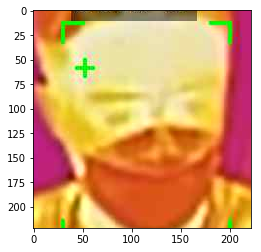

In [24]:
images = os.listdir('./json_100/json_100')
image = images[0]

name = image.split('.')[0]
temp= df.loc[df['image_id']==name]['individual_factors'].iloc[0]
print(f'factor: {temp}')
bbox = temp['bbox']
print('-'*50)
print(f'bounding_box:{bbox}')

img = cv2.imread('./json_100/json_100/'+image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[3]]
plt.imshow(img)

#### 열화상 이미지의 평균값을 구함

In [25]:
import numpy as np

print(np.mean(img[:,:,0]))
print(np.mean(img[:,:,1]))
print(np.mean(img[:,:,2]))

219.08087817547278
151.78138949760572
87.58838568298027
